## Build Boston Housing Project

#### Introduction
In this project, we will develop a neural-net-based regressor to estimate the price of house in Boston.

In [1]:
from __future__ import print_function

import os
import logging
from datetime import datetime

import keras
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt 

%matplotlib inline

Using TensorFlow backend.


### Prepare Data
In this section, we will prepare the training and test data for this project

In [2]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

boston = load_boston()
boston_feat_names = boston.feature_names

train_data, test_data, train_targets, test_targets = train_test_split(
    boston.data, boston.target, test_size=0.3, random_state=42)

/Users/yizhang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


visualize the distribution of target values in both train and test sets.

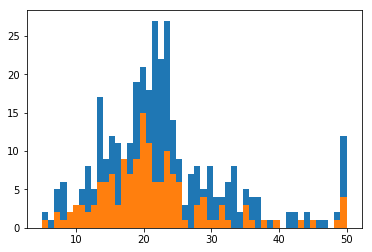

In [3]:
_ = plt.hist(train_targets, bins=50)
_ = plt.hist(test_targets, bins=50)

**Figure**: Histograms of target values in both train and test sets. 

**Discusion**: The distribution of train (blue) looks similiar to test's. KS-test can be used here to quantify the distance of two distributions.

### Preprocessing
Conduct necessary transformation to make data more suitable for the learning algorithm. What we will do here including the following operations:
    * normalize predictor variables

In [4]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std 
test_data -= mean
test_data /= std

### Building Model
In this section, we will build neural nets which will be used to learn the pattern mapping attributes of houses
to their prices in Boston.

In [5]:
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics


def build_seq_model(lr=0.001):
    model = models.Sequential()
    model.add(layers.Dense(64, 
                           activation='relu', 
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer=optimizers.rmsprop(lr=lr), 
                  loss=metrics.mse, 
                  metrics=['mae'])
    return model

In [6]:
def build_model(loss='mse', lr=0.001):
    model = models.Sequential()
    model.add(layers.Dense(64, 
                           activation='relu', 
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer=optimizers.rmsprop(lr=lr), 
                  loss=loss, 
                  metrics=['mae'])
    return model

In [12]:
from keras.callbacks import TensorBoard

callback_list = [
    TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=1,
        embeddings_freq=1
    )
]

### Train Model and Meausre Performance wth K-fold cross-validation

In [14]:
import numpy as np 

k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 500 
all_mae_histories = []
# all_mape_histories = []

for i in range(k):
    print('processing fold: {}'.format(i))
    start_time = datetime.now()

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], 
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
         train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
    
    model = build_seq_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets, 
                        # callbacks=callback_list,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, 
                        batch_size=1, 
                        verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
    duration = (datetime.now() - start_time).total_seconds()
    print("* time cost: {:.1f} seconds".format(duration))

processing fold: 0
* time cost: 122.8 seconds
processing fold: 1
* time cost: 121.8 seconds
processing fold: 2
* time cost: 122.3 seconds
processing fold: 3
* time cost: 124.9 seconds


In [71]:
import numpy as np 

k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 500 
all_mae_histories_loss_mae = []

for i in range(k):
    print('processing fold: {}'.format(i))
    start_time = datetime.now()

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], 
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
         train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
    
    model = build_model(loss='mae')
    history = model.fit(partial_train_data, 
                        partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, 
                        batch_size=1, 
                        verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories_loss_mae.append(mae_history)
    
    duration = (datetime.now() - start_time).total_seconds()
    print("* time cost: {:.1f} seconds".format(duration))

processing fold: 0
* time cost: 122.6 seconds
processing fold: 1
* time cost: 124.7 seconds
processing fold: 2
* time cost: 121.9 seconds
processing fold: 3
* time cost: 122.5 seconds


In [72]:
import numpy as np 

k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 500 
all_mae_histories_loss_mape = []

for i in range(k):
    print('processing fold: {}'.format(i))
    start_time = datetime.now()

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], 
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
         train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
    
    model = build_model(loss='mape')
    history = model.fit(partial_train_data, 
                        partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, 
                        batch_size=1, 
                        verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories_loss_mape.append(mae_history)
    
    duration = (datetime.now() - start_time).total_seconds()
    print("* time cost: {:.1f} seconds".format(duration))

processing fold: 0
* time cost: 125.8 seconds
processing fold: 1
* time cost: 129.8 seconds
processing fold: 2
* time cost: 130.3 seconds
processing fold: 3
* time cost: 129.8 seconds


visualize the perofmrance computed with validation data

In [38]:
def smooth_curve(points, factor=0.9):
    """
    """
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

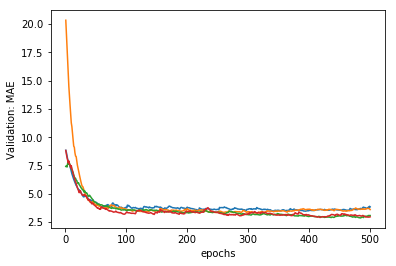

In [68]:
for ii in range(len(all_mae_histories)):
    smoothed_all_mae_histories = smooth_curve(all_mae_histories[ii])
    plt.plot(range(1, len(smoothed_all_mae_histories)+1), smoothed_all_mae_histories)
    plt.xlabel('epochs')
    plt.ylabel('Validation: MAE')

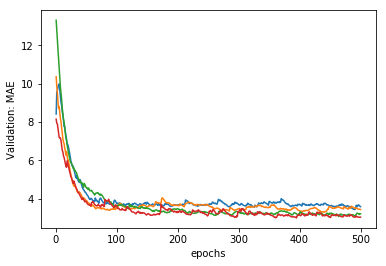

In [75]:
for ii in range(len(all_mae_histories_loss_mape)):
    smoothed_all_mae_histories = smooth_curve(all_mae_histories_loss_mae[ii])
    plt.plot(range(1, len(smoothed_all_mae_histories)+1), smoothed_all_mae_histories)
    plt.xlabel('epochs')
    plt.ylabel('Validation: MAE')

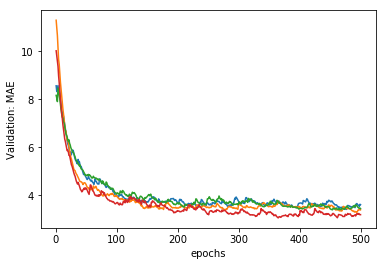

In [74]:
for ii in range(len(all_mae_histories_loss_mape)):
    smoothed_all_mae_histories = smooth_curve(all_mae_histories_loss_mape[ii])
    plt.plot(range(1, len(smoothed_all_mae_histories)+1), smoothed_all_mae_histories)
    plt.xlabel('epochs')
    plt.ylabel('Validation: MAE')

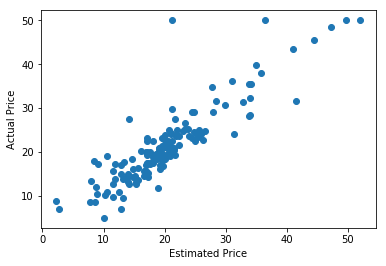

In [62]:
test_pred_target = model.predict(test_data).flatten()

plt.scatter(x=test_pred_target, y=test_targets)
plt.xlabel('Estimated Price')
plt.ylabel('Actual Price')

check the optimal evaulation can be achieved with training with different loss function.

In [83]:
np.min(all_mae_histories), np.min(all_mae_histories_loss_mae), np.min(all_mae_histories_loss_mape)

(2.3767296238379045, 2.480926714160226, 2.632128807631406)